In [5]:
using LazySets, Plots

In [6]:
Z1 = rand(Zonotope, dim=2, num_generators=2) # orden 1

Z2 = rand(Zonotope, dim=2, num_generators=4); # orden 2

In [10]:
Z1red = reduce_order(Z1, 1)
Z2red = reduce_order(Z2, 1);

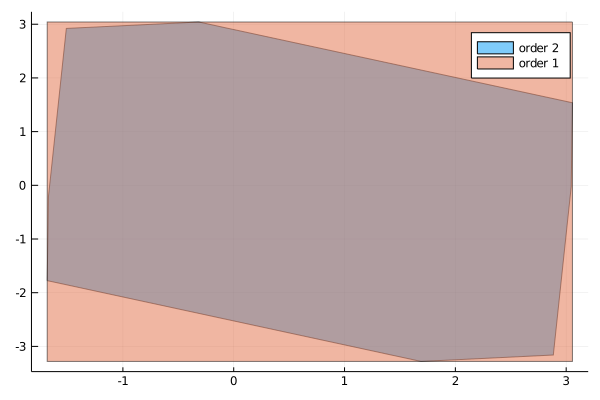

In [14]:
plot(Z2, lab="order 2")
plot!(Z2red, lab="order 1")

In [16]:
?HParallelotope

search: HParallelotope



```
HParallelotope{N<:Real, VN<:AbstractVector{N}, MN<:AbstractMatrix{N}} <: AbstractZonotope{N}
```

Type that represents a parallelotope in constraint form.

### Fields

  * `directions` – square matrix such that each row is the direction of two parallel constraints
  * `offset`     – vector such that each element is the offset of the corresponding constraint

### Notes

Parallelotopes are centrally symmetric convex polytopes in $\mathbb{R}^n$ having $2n$ pairwise parallel constraints. Every parallelotope is a zonotope. As such, parallelotopes can be represented either in constraint form or in generator form. The `HParallelotope` type represents parallelotopes in constraint form.

The constraint form of a parallelotope is described next. Let $D ∈ \mathbb{R}^{n × n}$ be a matrix and let $c ∈ \mathbb{R}^{2n}$ be a vector. The parallelotope $P ⊂ \mathbb{R}^n$ generated by the directions matrix $D$ and the offset vector $c$ is given by the set of points $x ∈ \mathbb{R}^$ such that:

$$
    D_i ⋅ x ≤ c_{i},\text{  and  } -D_i ⋅ x ≤ c_{n+i}
$$

for $i = 1, …, n$. Here $D_i$ represents the $i$-th row of $D$ and $c_i$ the $i$-th component of $c$.

For details on the notions given in these notes as well as applications of parallelotopes in reachability analysis we refer to [1] and [2]. For conversions between set representations we refer to [3].

### References

[1] Tommaso Dreossi, Thao Dang, and Carla Piazza. *Reachability computation for polynomial dynamical systems.*     Formal Methods in System Design 50.1 (2017): 1-38.

[2] Tommaso Dreossi, Thao Dang, and Carla Piazza. *Parallelotope bundles for polynomial reachability.*     Proceedings of the 19th International Conference on Hybrid Systems: Computation and Control. ACM, 2016.

[3] Matthias Althoff, Olaf Stursberg, and Martin Buss. *Computing reachable sets of hybrid systems using     a combination of zonotopes and polytopes.* Nonlinear analysis: hybrid systems 4.2 (2010): 233-249.


In [38]:
order(Z2)

2//1

In [37]:
_overapproximate(Z2, HParallelotope)

HParallelotope{Float64,Array{Float64,1},LinearAlgebra.Adjoint{Float64,Array{Float64,2}}}([0.4073992604084212 0.9132501533636178; -0.9986770474787501 0.05142134614269108], [2.648956325231049, 1.6587349736527846, 2.3070153049583264, 3.042738532691217])

In [42]:
G = genmat(Z2)

2×4 Array{Float64,2}:
 -1.68628   -0.0806774  -0.00552018  -0.597177
  0.752246  -1.56687    -0.781879    -0.0597674

In [44]:
Γ = view(G, :, 1:2)

2×2 view(::Array{Float64,2}, :, 1:2) with eltype Float64:
 -1.68628   -0.0806774
  0.752246  -1.56687

In [45]:
□Γ⁻¹Z = box_approximation(linear_map(inv(Γ), Z2))

Hyperrectangle{Float64,Array{Float64,1},Array{Float64,1}}([-0.40168893190000005, -0.11679797658671706], [1.3645411955671332, 1.6928283654462417])

In [47]:
P = linear_map(Γ, □Γ⁻¹Z)

Zonotope{Float64,Array{Float64,1},Array{Float64,2}}([0.6867829113557052, -0.11916158963705781], [-2.3009983317119325 -0.13657298769400755; 1.0264712412998733 -2.6524453042734986])

In [54]:
P = _overapproximate_hparallelotope(Z2, HParallelotope, 1:dim(Z2))

Zonotope{Float64,Array{Float64,1},Array{Float64,2}}([0.6867829113557052, -0.11916158963705781], [-2.3009983317119325 -0.13657298769400755; 1.0264712412998733 -2.6524453042734986])

In [67]:
using BenchmarkTools

In [68]:
@btime _convert_v1(HParallelotope, $P)

  2.872 μs (54 allocations: 4.80 KiB)


HParallelotope{Float64,Array{Float64,1},Array{Float64,2}}([0.4073992604084212 0.9132501533636178; -0.9986770474787501 0.05142134614269108], [2.648956325231049, 1.6587349736527846, 2.3070153049583264, 3.042738532691217])

In [69]:
@btime _convert_v2(HParallelotope, $P)

  2.666 μs (50 allocations: 4.47 KiB)


HParallelotope{Float64,Array{Float64,1},Array{Float64,2}}([0.4073992604084212 0.9132501533636178; -0.9986770474787501 0.05142134614269108], [2.648956325231049, 1.6587349736527846, 2.3070153049583264, 3.042738532691217])

In [70]:
@btime constraints_list($P)

  2.450 μs (48 allocations: 4.25 KiB)


4-element Array{HalfSpace{Float64,Array{Float64,1}},1}:
 HalfSpace{Float64,Array{Float64,1}}([0.4073992604084212, 0.9132501533636178], 2.648956325231049)
 HalfSpace{Float64,Array{Float64,1}}([-0.4073992604084212, -0.9132501533636178], 2.3070153049583264)
 HalfSpace{Float64,Array{Float64,1}}([-0.9986770474787501, 0.05142134614269108], 1.6587349736527846)
 HalfSpace{Float64,Array{Float64,1}}([0.9986770474787501, -0.05142134614269108], 3.042738532691217)

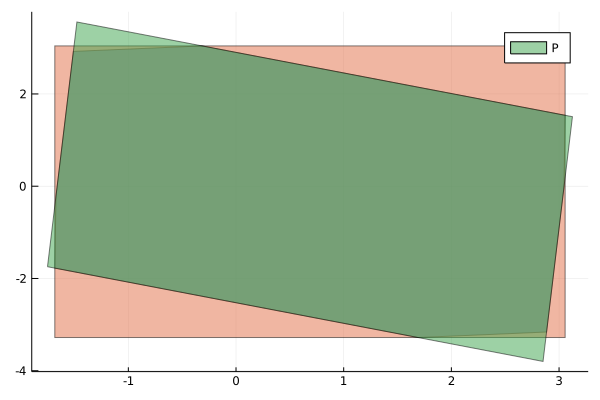

In [55]:
plot(Z2)
plot!(reduce_order(Z2, 1))
#plot!(□Γ⁻¹Z)
plot!(P, lab="P")

In [64]:
function _convert_v1(::Type{<:HParallelotope}, Z::AbstractZonotope)
    @assert order(Z) == 1 "cannot convert a zonotope that is not of order 1 to"*
                          " a parallelotope"
    n = Int(2*dim(Z))
    constraints = constraints_list(Z)

    D = copy(transpose(reduce(hcat, [constraints[i].a for i in 1:2:n])))
    c = [constraints[i].b for i in 1:2:n-1]
    append!(c, [constraints[i].b for i in 2:2:n])
    return HParallelotope(D, c)
end

function _convert_v2(::Type{<:HParallelotope}, Z::AbstractZonotope{N}) where {N}
    @assert order(Z) == 1 "cannot convert a zonotope that is not of order 1 to"*
                          " a parallelotope"
    n = dim(Z)

    constraints = constraints_list(Z)
    
    D = Matrix{N}(undef, n, n)
    c = Vector{N}(undef, 2n)
    j = 1
    @inbounds for i in 1:n
        D[i, :] = constraints[j].a
        c[i] = constraints[j].b
        c[i+n] = constraints[j+1].b
        j += 2
    end
    return HParallelotope(D, c)
end

_convert_v2 (generic function with 1 method)

In [124]:
function _overapproximate(Z::Zonotope, ::Type{<:HParallelotope}, indices=1:dim(Z))
    Zred = _overapproximate_hparallelotope(Z, HParallelotope, indices)
    return _convert(HParallelotope, Zred)
end

function _overapproximate_hparallelotope(Z::Zonotope, ::Type{<:HParallelotope}, indices=1:dim(Z))
    length(indices) == dim(Z) || throw(ArgumentError("the number of generator indices is $(length(indices)), " *
                                                     "but it was expected to be $(dim(Z))"))

    p, n = ngens(Z), dim(Z)
    if p == n
        return _convert(HParallelotope, Z)
    elseif p < n
        error("the zonotope order is $(order(Z)) but it should be at least 1")
    end
    
    G = genmat(Z)
    Γ = G[:, indices]
    □Γ⁻¹Z = box_approximation(linear_map(inv(Γ), Z))
    return linear_map(Γ, □Γ⁻¹Z)
end

_overapproximate_hparallelotope (generic function with 2 methods)

---

In [117]:
Z = rand(Zonotope, dim=2, num_generators=6)

P = _overapproximate(Z, HParallelotope)

HParallelotope{Float64,Array{Float64,1},Array{Float64,2}}([-0.9556974344135548 -0.29435083464354106; 0.3193473431555494 0.9476377337461251], [3.665159986973069, 2.8791610762455373, 3.2699373582582987, 2.8019313291480237])

In [123]:
@btime _overapproximate($Z, HParallelotope) # view

  4.770 μs (73 allocations: 6.31 KiB)


HParallelotope{Float64,Array{Float64,1},Array{Float64,2}}([-0.9556974344135548 -0.29435083464354106; 0.3193473431555494 0.9476377337461251], [3.665159986973069, 2.8791610762455373, 3.2699373582582987, 2.8019313291480237])

In [125]:
@btime _overapproximate($Z, HParallelotope) # array

  4.791 μs (74 allocations: 6.42 KiB)


HParallelotope{Float64,Array{Float64,1},Array{Float64,2}}([-0.9556974344135548 -0.29435083464354106; 0.3193473431555494 0.9476377337461251], [3.665159986973069, 2.8791610762455373, 3.2699373582582987, 2.8019313291480237])

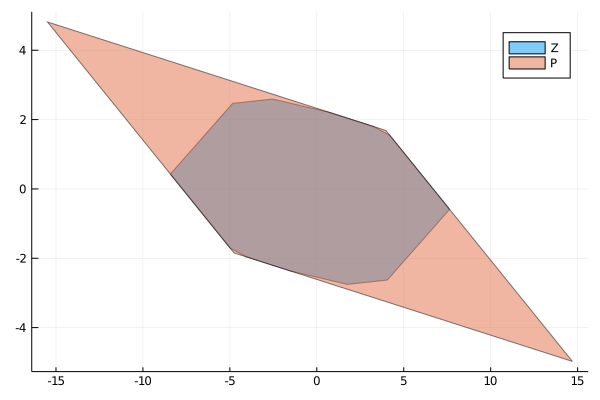

In [114]:
P = _overapproximate(Z, HParallelotope, [3,5])
plot(Z, lab="Z")
plot!(P, lab="P")

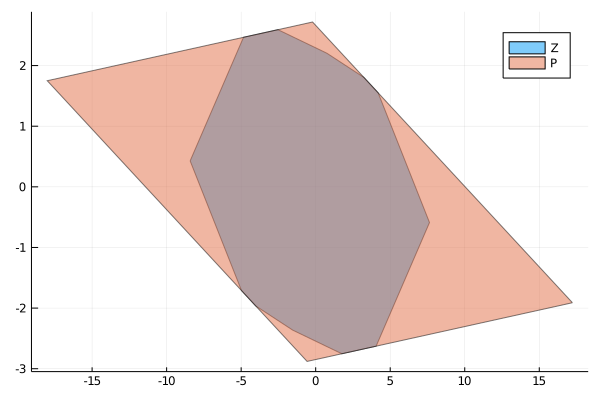